In [1]:
import string
from collections import Counter
import os
import pickle

import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#
# Domain specific libraries to handle text
#
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [2]:
data_dir    =r"../../data"  # directory to save intermediate results
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [3]:
#data_healthy_dir    ="../../data/Funds Articles_Healthy_New.xlsx"
#data_unhealthy_dir    ="../../data/Fund Articles_Unealthy_New.xlsx"
#if not os.path.exists(data_healthy_dir):
#    os.mkdir(data_healthy_dir)

In [4]:
#unhealthy = pd.read_excel(data_unhealthy_dir )
#healthy = pd.read_excel(data_healthy_dir )

In [5]:
unhealthy = pd.read_excel('/Users/victor/Documents/GitHub/SP-Global-Ops-Consulting/data/Fund Articles_Unhealthy_New.xlsx')
healthy = pd.read_excel('/Users/victor/Documents/GitHub/SP-Global-Ops-Consulting/data/Funds Articles_Healthy_New.xlsx')

In [6]:
healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5342 entries, 0 to 5341
Data columns (total 2 columns):
Healthy Fund Articles    5342 non-null object
Unnamed: 1               1837 non-null object
dtypes: object(2)
memory usage: 83.5+ KB


In [7]:
healthy.drop('Unnamed: 1',axis=1,inplace=True)

In [8]:
unhealthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 1 columns):
Unhealthy Fund Articles    8361 non-null object
dtypes: object(1)
memory usage: 65.4+ KB


In [9]:
healthy.head()

,Healthy Fund Articles
0,Mitel Returns To Profit In The Second Quarter ...
1,TriplePoint Venture Growth BDC Corp. Announces...
2,"@ M&A wrap: Sycamore, Staples, Leonardo DiCapr..."
3,GTIS Partners LP Broadens Business Model; Anno...
4,@ Cinven to buy Dublin-headquartered Axa Life ...


In [10]:
unhealthy.head()

,Unhealthy Fund Articles
0,Intertrust reports Q2 and H1 2018 results\n\nP...
1,"Zhengzhou Huiren Hospital Management Co., Ltd...."
2,REPEAT: Compilation of stories on RBI Bi-month...
3,CBL Properties Reports Results for Second Quar...
4,"Prudential Financial, Inc. Announces Second Qu..."


# Word Count

In [29]:
import nltk
nltk.download('punkt') # punctuation items required by tokenizer
nltk.download('stopwords') # for stop words

[nltk_data] Downloading package punkt to /Users/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We define our set of stopwords as the stopwords recensed on nltk ('I','but','however',etc...) plus the punctuation

In [30]:
punctuation=list(string.punctuation)
digits= list(string.digits)
stop_words=stopwords.words("english")+punctuation+['``',"''",'--']+digits+['pm']

In [31]:
string.digits

'0123456789'

#### Tokenizer 

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
porter_stemmer = PorterStemmer()

In [34]:
def stem_tokenizer(text):
    porter_stemmer=PorterStemmer()
    return [porter_stemmer.stem(token) for token in word_tokenize(text.replace("'"," "))]

In [35]:
def lemma_tokenizer(text):
    lemmatizer=WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text.replace("'"," "))]

In [36]:
countVectorizer=CountVectorizer(input='content',tokenizer=lemma_tokenizer,stop_words=stop_words)

In [37]:
X=countVectorizer.fit_transform(healthy['Healthy Fund Articles'])

In [38]:
X

<5342x96997 sparse matrix of type '<class 'numpy.int64'>'
	with 1253183 stored elements in Compressed Sparse Row format>

In [39]:
X[0].nonzero()[1]

array([26611, 83169, 75332, 75920, 96059, 35500,  2142, 96061, 72406,
       83037, 75243, 88169, 22648, 53631, 72641, 39246,    62, 69821,
          53, 32482, 72002, 42967, 82789, 86634,  6822,  2708,  4187,
       86676, 29923, 78300, 33652, 16129, 22399, 30464, 13272, 76513,
        9917, 65627,  2730, 58973, 34623, 79327, 69802,  2735, 62145,
        7141, 40221, 28314, 87880, 45892, 41880, 72126, 87895, 69121,
       31221, 78286, 22218, 34581, 78352, 75603, 33614, 60302, 77262,
       62623,  3283, 40555,  3156, 72174, 29875, 58539, 65406, 63434,
        6068, 35757, 93305, 21161, 74330, 30161, 21157, 10193, 26185,
       92367, 72834, 13675, 33560, 75660, 73234, 78339, 72350, 75590, 62494], dtype=int32)

Total number of words in corpus

In [40]:
print("Total Words",X.sum())

Total Words 2299196


Vocabulary size

In [41]:
len(countVectorizer.vocabulary_)

96997

Each word in document gets mapped to a vocabulary index

In [51]:
df = pd.DataFrame()

words=list(countVectorizer.vocabulary_.keys())[:30] # only get the first 5 words
for word in words:
    print( word,countVectorizer.vocabulary_[word])
    
df=pd.DataFrame(list(countVectorizer.vocabulary_.keys())[:30],columns=['word'])
df['count']= df['word'].apply(lambda x: countVectorizer.vocabulary_(x))

mitel 62494
return 75590
profit 72350
second 78339
quarter 73234
revenue 75660
climb 33560
36 13675
published 72834
wednesday 92367
august 26185
2018 10193
9:17:00 21157
bst 30161
received 74330
9:17:25 21161
word 93305
count 35757
123 6068
mt 63434
newswires 65406
live 58539
brief 29875
pro 72174
04:17 3156
edt 40555
08/01/2018 3283
mnw.to 62623
said 77262
market 60302


TypeError: 'dict' object is not callable

In [50]:
df

,word,count
0,mitel,mitel
1,return,return
2,profit,profit
3,second,second
4,quarter,quarter
5,revenue,revenue
6,climb,climb
7,36,36
8,published,published
9,wednesday,wednesday


Lets print the word counts on  a couple of documents:

In [25]:
print("doc","word"+" "*11,"dim","count",sep="\t")
for i1 in range(2):
    for word in words:
        document=X[i1]
        dimension=countVectorizer.vocabulary_[word]
        print(i1,f"{word:15}",dimension,document[0,dimension],sep="\t")

doc	word           	dim	count
0	mitel          	62505	3
0	return         	75602	1
0	profit         	72362	2
0	second         	78351	2
0	quarter        	73246	3
0	revenue        	75672	2
0	climb          	33571	1
0	36             	13680	2
0	published      	72846	1
0	wednesday      	92379	3
1	mitel          	62505	0
1	return         	75602	3
1	profit         	72362	0
1	second         	78351	24
1	quarter        	73246	33
1	revenue        	75672	1
1	climb          	33571	0
1	36             	13680	0
1	published      	72846	1
1	wednesday      	92379	2


So X is just a **matrix**:
* **rows** are **documents**
* **columns** are **words**, each word has its own column

There are 88k columns, but the representation is **sparse** to save memory, only non-zero entries are stored in X.

### Represent Text as TF-IDF weighted Counts

In [26]:
tfidfVectorizer=TfidfVectorizer(input="content",tokenizer=lemma_tokenizer,stop_words=stop_words)

In [27]:
Xi=tfidfVectorizer.fit_transform(healthy['Healthy Fund Articles'])

### Using Digrams as features

In [75]:
digramVectorizer=CountVectorizer(input="content",tokenizer=tokenizer,stop_words=stop,ngram_range=(2,2))

In [76]:
X_digram=digramVectorizer.fit_transform(healthy['Healthy Fund Articles'])

In [77]:
digrams=list(digramVectorizer.vocabulary_.keys())[:5] # only get the first 5 digrams
for digram in digrams:
    print( digram,digramVectorizer.vocabulary_[digram])

mitel return 572067
return profit 719423
profit second 674483
second quarter 745801
quarter revenu 687189


In [78]:
V_digram=X_digram.shape[1]
V_digram

925407

In [79]:
print("doc","digram"+" "*11,"dim","count",sep="\t")
for i1 in range(2):
    for digram in digrams:
        document=X_digram[i1]
        dimension=digramVectorizer.vocabulary_[digram]
        print(i1,f"{digram:15}",dimension,document[0,dimension],sep="\t")

doc	digram           	dim	count
0	mitel return   	572067	1
0	return profit  	719423	1
0	profit second  	674483	1
0	second quarter 	745801	2
0	quarter revenu 	687189	1
1	mitel return   	572067	0
1	return profit  	719423	0
1	profit second  	674483	0
1	second quarter 	745801	24
1	quarter revenu 	687189	0


In [ ]:
count_vectorizer_filename=   data_dir+"/count_vectorizer.p"

# Natural Entity Recognition

In [141]:
nlp = spacy.load('en')
list = []

for article in healthy['Healthy Fund Articles']:
    doc = nlp(article)
    df = pd.DataFrame(np.array([ent.label_ for ent in doc.ents]),columns=['label'])
    if 'ORG' in df['label'].unique():
        list.append(df['label'].value_counts()['ORG'])
    else:
        list.append(0)
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


KeyboardInterrupt: 

In [120]:
nlp = spacy.load('en')

In [121]:
string = healthy['Healthy Fund Articles'].sum()

In [122]:
doc = nlp(string[:999999])

In [128]:
df = pd.DataFrame(np.array([ent.label_ for ent in doc.ents]),columns=['label'])
df.head()

,label
0,PERSON
1,ORDINAL
2,PERCENT
3,DATE
4,TIME


In [138]:
df['label'].value_counts()['ORG']

6188

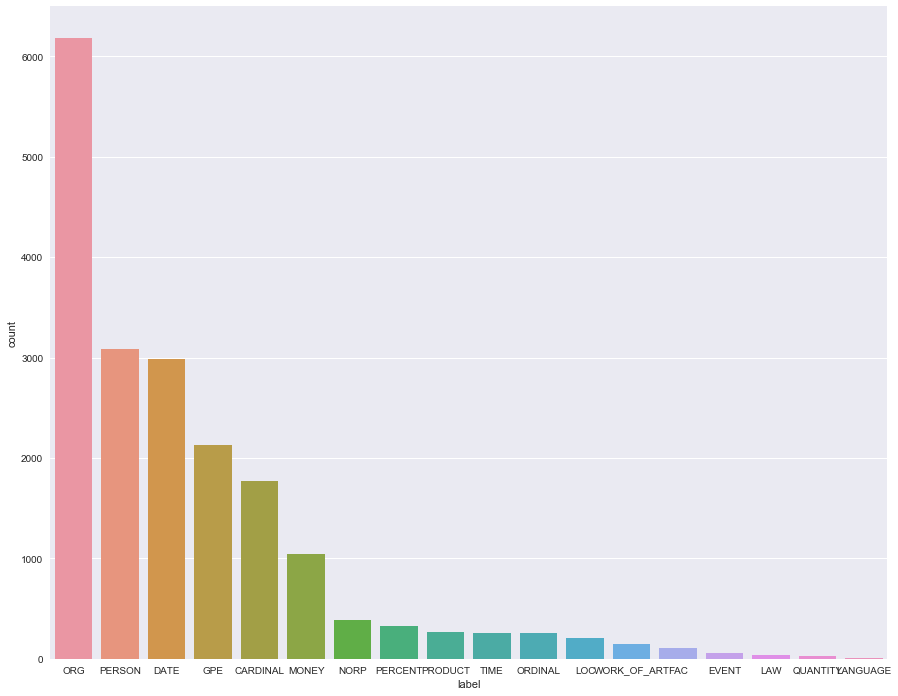

In [135]:
sns.set(rc={'figure.figsize':(15,12)})

sns.countplot(x='label', data=df, order = df['label'].value_counts().index)

In [ ]:
#separating into train and test
#X_train, X_test, y_train, y_test = train_test_split(
#                                             df['plot'], y, 
#                                             test_size=0.33, 
#                                             random_state=53)